Inductive reasoning is where you draw general conclusion from specific observations. Ex: Geese are similar to ducks-Geese can fly-therefore ducks can fly
Deductive reasoning is drawing logical conclusions from provided premises. Ex: All dogs have ears-golden retrievers are dogs- therefore golden retrievers have ears

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

df_adult_data = pd.read_csv("adult/adult.csv")
df_adult_index = pd.read_csv("adult/adult_index.csv")
df_adult_names = pd.read_csv("adult/adult_names.csv", delimiter=";")
df_adult_test = pd.read_csv("adult/adult_test.csv")
df_old = pd.read_csv("adult/old.adult.names.csv", delimiter=";")
df_adult = df_adult_data.join(df_adult_index)
df_adult = df_adult.join(df_adult_names)
df_adult = df_adult.join(df_old)
df_adult



,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Index of adult,| This data was extracted from the census bureau database found at,1. Title of Database: adult
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,02 Dec 1996 140 Index,| http://www.census.gov/ftp/pub/DES/www/welcom...,2. Sources:
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,10 Aug 1996 3974305 adult.data,"| Donor: Ronny Kohavi and Barry Becker,",(a) Original owners of database (name/phone...
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,10 Aug 1996 4267 adult.names,| Data Mining and Visualization,US Census Bureau.
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,10 Aug 1996 2003153 adult.test,| Silicon Graphics.,(b) Donor of database (name/phone/snail add...
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,NaN,| e-mail: ronnyk@sgi.com for questions.,"Ronny Kohavi and Barry Becker,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,NaN,NaN,NaN
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,NaN,NaN,NaN
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,NaN,NaN,NaN
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,NaN,NaN,NaN


In [88]:
df_adult = df_adult.rename(columns={ ' Bachelors': "Education",  ' Male': "Gender",  ' Never-married': "Marrige Status",  ' White': "Race",  ' Not-in-family': "Family Relations", 
       '| This data was extracted from the census bureau database found at': "Census Data",  ' <=50K': "Money",  ' 77516': "Education Number",  ' United-States': "Country", ' Adm-clerical': "Cleric",'39': "Age"})

df_adult

,Age,State-gov,Education Number,Education,13,Marrige Status,Cleric,Family Relations,Race,Gender,2174,0,40,Country,Money,Index of adult,Census Data,1. Title of Database: adult
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,02 Dec 1996 140 Index,| http://www.census.gov/ftp/pub/DES/www/welcom...,2. Sources:
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,10 Aug 1996 3974305 adult.data,"| Donor: Ronny Kohavi and Barry Becker,",(a) Original owners of database (name/phone...
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,10 Aug 1996 4267 adult.names,| Data Mining and Visualization,US Census Bureau.
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,10 Aug 1996 2003153 adult.test,| Silicon Graphics.,(b) Donor of database (name/phone/snail add...
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,NaN,| e-mail: ronnyk@sgi.com for questions.,"Ronny Kohavi and Barry Becker,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,NaN,NaN,NaN
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,NaN,NaN,NaN
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,NaN,NaN,NaN
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,NaN,NaN,NaN


In [89]:
df_adult = df_adult.drop(columns = [' 13',  'Index of adult',  'Education Number',  ' 2174',  ' 0',  ' 40',  'Census Data',  '1. Title of Database: adult'], axis=1)

In [90]:
print(df_adult.columns)

Index(['Age', ' State-gov', 'Education', 'Marrige Status', 'Cleric',
       'Family Relations', 'Race', 'Gender', 'Country', 'Money'],
      dtype='object')


In [91]:
df_adult

,Age,State-gov,Education,Marrige Status,Cleric,Family Relations,Race,Gender,Country,Money
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [92]:
def cleaning(df_adult:pd.DataFrame)->pd.DataFrame:
    df_adult["Money"] = df_adult["Money"].apply(lambda x: 0 if x == " <=50K" else 1)
    df_adult["Gender"] = df_adult["Gender"].apply(lambda x: 0 if x == " Male" else 1)
    df_adult["Race"] = df_adult["Race"].apply(lambda x: 1 if x == " White" else 2 if x == " Black" else 3 if x == " Asian-Pac-Islander" else 4 if x == " Amer-Indian-Eskimo" else 0)
    df_adult["Family Relations"] = df_adult["Family Relations"].apply(lambda x: 1 if x == " Husband" else 2 if x == " Not-in-family" else 3 if x == " Own-child" else 4 if x == " Unmarried" else 5 if x == " Wife" else 0)
    df_adult["Education"] = df_adult["Education"].apply(lambda x: 1 if x == " HS-grad" else 2 if x == " Some-college" else 3 if x == " Bachelors" else 4 if x == " Masters" else 5 if x == " Assoc-voc" else 6 if x == " 11th" else 7 if x == " Assoc-acdm" else 8 if x == " 10th" else 9 if x == " 7th-8th" else 10 if x == " Prof-school" else 11 if x == " 9th" else 12 if x == " 12th" else 13 if x == " Doctorate" else 14 if x == " 5th-6th" else 15 if x == " 1st-4th" else 0)
    df_adult["Cleric"] = df_adult["Cleric"].apply(lambda x: 1 if x == " Prof-specialty" else 2 if x == " Craft-repair" else 3 if x == " Exec-managerial" else 4 if x == " Adm-clerical" else 5 if x == " Sales" else 6 if x == " Other-serivice" else 7 if x == " Machine-op-inspct" else 8 if x == " Transport-moving" else 9 if x == " Handlers-cleaners" else 10 if x == " Farming-fishing" else 11 if x == " Tech-support" else 12 if x == " Protective-serv" else 13 if x == " Priv-house-serv" else 14 if x == " Armed-Forces" else 0)
    df_adult["Marrige Status"] = df_adult["Marrige Status"].apply(lambda x: 1 if x == " Married-civ-spouse" else 2 if x == " Never-married" else 3 if x == " Spearated" else 4 if x == " Widowed" else 5 if x == " Married-spouse-absent" else 6 if x == " Married-AF-spouse" else 0)
    df_adult["Country"] = df_adult["Country"].apply(lambda x: 1 if x == " United-States" else 0)
    df_adult[" State-gov"] = df_adult[" State-gov"].apply(lambda x: 1 if x == " Private" else 2 if x == " Self-emp-not-inc" else 3 if x == " Local-gov" else 4 if x == " State-gov" else 5 if x == " Self-emp-inc" else 6 if x == " Federal-gov" else 7 if x == " Without-pay" else 8 if x == " Never-worked" else 0)
    return df_adult


In [93]:
cleaning(df_adult)

,Age,State-gov,Education,Marrige Status,Cleric,Family Relations,Race,Gender,Country,Money
0,50,2,3,1,3,1,1,0,1,0
1,38,1,1,0,9,2,1,0,1,0
2,53,1,6,1,9,1,2,0,1,0
3,28,1,3,1,1,5,2,1,0,0
4,37,1,4,1,3,5,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
32555,27,1,7,1,11,5,1,1,1,0
32556,40,1,1,1,7,1,1,0,1,1
32557,58,1,1,4,4,4,1,1,1,0
32558,22,1,1,2,4,3,1,0,1,0


In [94]:
df_adult_clean = pd.get_dummies(df_adult[["Marrige Status", "Cleric"]])



In [95]:
df_adult_clean

,Marrige Status,Cleric
0,1,3
1,0,9
2,1,9
3,1,1
4,1,3
...,...,...
32555,1,11
32556,1,7
32557,4,4
32558,2,4


In [96]:
from sklearn.preprocessing import StandardScaler

X = df_adult.drop("Money", axis=1)
y = df_adult["Money"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

In [97]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [98]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(random_state=42)
model_1.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

I choose to oversample since the data for "Money" is no the same there are people with more than 50K than people with less

In [99]:
y_pred = model_1.predict(X_test)

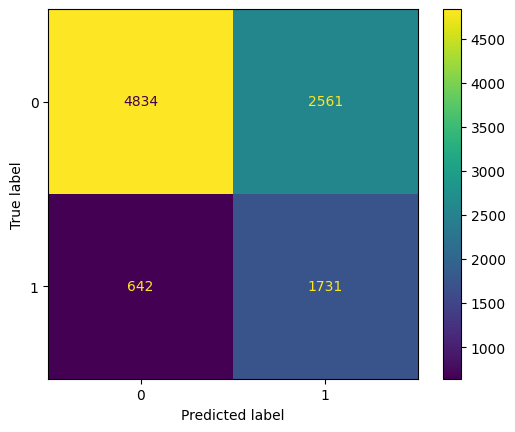

In [100]:
ConfusionMatrixDisplay.from_estimator(model_1, X_test, y_test)

In [101]:
1874/(499+1874)

0.7897176569742942

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_split=5, class_weight="balanced")
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7704750204750205

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75      7395
           1       0.40      0.73      0.52      2373

    accuracy                           0.67      9768
   macro avg       0.64      0.69      0.64      9768
weighted avg       0.77      0.67      0.69      9768



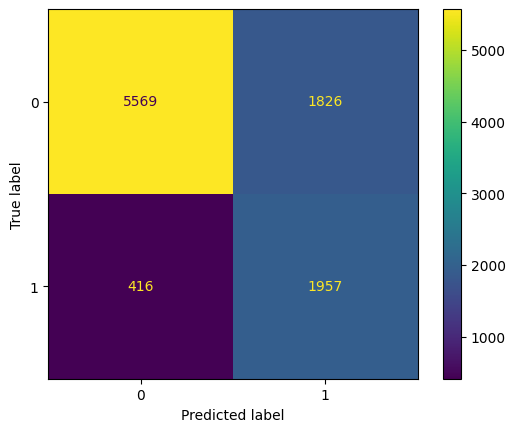

In [104]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

Increased the recall by setting n_estimators = 200, max_depth = 10, min_samples_split = 5, class_weight = "balanced"

In [105]:
1957/(416+1957)

0.8246944795617362

In [106]:
print(rf.feature_importances_, X.columns)

[0.18475443 0.02998673 0.1124735  0.21827004 0.11129174 0.2703511
 0.01330381 0.0522348  0.00733383] Index(['Age', ' State-gov', 'Education', 'Marrige Status', 'Cleric',
       'Family Relations', 'Race', 'Gender', 'Country'],
      dtype='object')


[Text(0.5019087357954546, 0.9545454545454546, 'x[7] <= 0.361\ngini = 0.5\nsamples = 14427\nvalue = [11432.838, 11279.289]'),
 Text(0.2246981534090909, 0.8636363636363636, 'x[5] <= -0.441\ngini = 0.487\nsamples = 9610\nvalue = [6936.009, 9576.558]'),
 Text(0.36330344460227276, 0.9090909090909092, 'True  '),
 Text(0.07368607954545454, 0.7727272727272727, 'x[5] <= -1.252\ngini = 0.417\nsamples = 6063\nvalue = [3600.883, 8532.411]'),
 Text(0.017518939393939392, 0.6818181818181818, 'x[3] <= 0.203\ngini = 0.093\nsamples = 247\nvalue = [244.707, 12.505]'),
 Text(0.01231060606060606, 0.5909090909090909, 'x[2] <= 0.021\ngini = 0.325\nsamples = 52\nvalue = [48.678, 12.505]'),
 Text(0.007575757575757576, 0.5, 'x[2] <= -0.611\ngini = 0.425\nsamples = 34\nvalue = [28.286, 12.505]'),
 Text(0.003787878787878788, 0.4090909090909091, 'x[1] <= -0.041\ngini = 0.0\nsamples = 18\nvalue = [16.445, 0.0]'),
 Text(0.001893939393939394, 0.3181818181818182, 'gini = 0.0\nsamples = 14\nvalue = [11.841, 0.0]'),
 Te

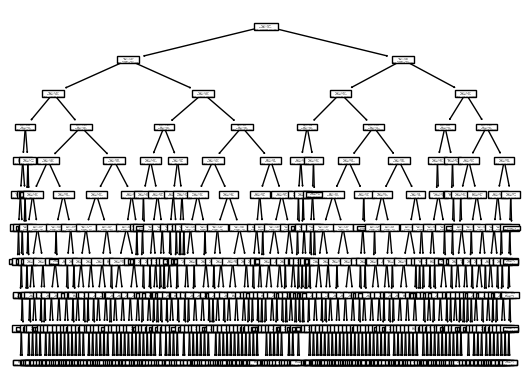

In [107]:
import matplotlib.pyplot as plt
rf_tree = rf.estimators_[4]
tree.plot_tree(rf_tree)


In [108]:
model = tree.DecisionTreeClassifier(max_depth=10, random_state=42, class_weight="balanced", min_samples_split=2)

In [109]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [110]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      7395
           1       0.50      0.83      0.62      2373

    accuracy                           0.76      9768
   macro avg       0.71      0.78      0.72      9768
weighted avg       0.83      0.76      0.77      9768



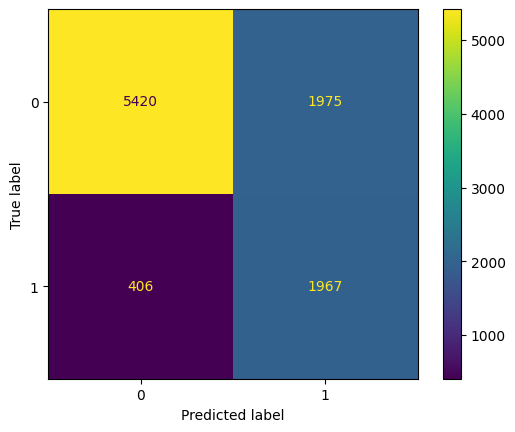

In [112]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Increased the recall by setting the class_weight = "balance" as well as max_depth = 10 and finally min_samples_split = 2

In [113]:
1967/(406+1967)

0.8289085545722714

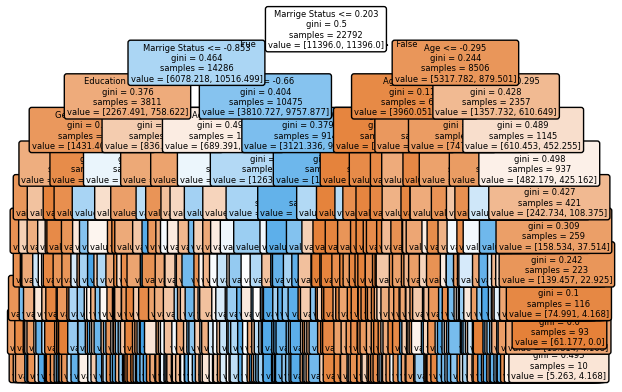

FileNotFoundError: [Errno 2] No such file or directory: 'Week_10/tree.svg'

<Figure size 640x480 with 0 Axes>

In [114]:
tree.plot_tree(model, feature_names=list(X.columns), filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("Week_10/tree.svg")

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 200, max_depth = 5, random_state = 42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      7395
           1       0.61      0.17      0.27      2373

    accuracy                           0.77      9768
   macro avg       0.69      0.57      0.57      9768
weighted avg       0.74      0.77      0.72      9768



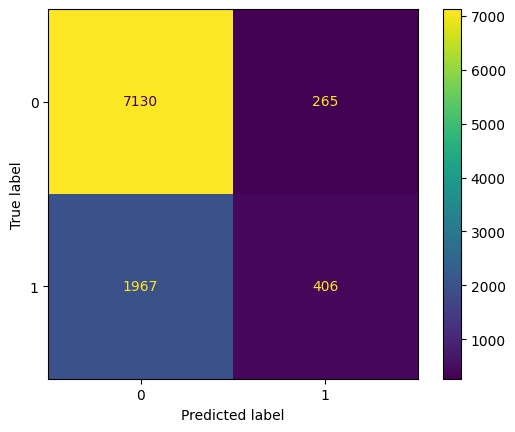

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

I tried to increase the recall by setting n_estimators = 200, max_depth = 5, random_state = 42. However; even after tinkering the farthest I could get the recall score is 0.1689

In [ ]:
401/(1972+401)

0.16898440792246103

In [ ]:
from sklearn.metrics import precision_recall_curve

precision_recall_curve(y_test, y_pred)

(array([0.24293612, 0.60506706, 1.        ]),
 array([1.        , 0.17109145, 0.        ]),
 array([0, 1]))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

print(type(y_test))
print(type(y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(fpr, tpr)
auc

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0.         0.03583502 1.        ] [0.         0.17109145 1.        ]


np.float64(0.5676282108815451)

In [ ]:
print(model.score(X_test, y_test))

0.7562448812448812


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
steps = [("pca", PCA(n_components =7)), ("m", LogisticRegression())]
model_1 = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3, random_state=42)
n_scores = cross_val_score(model_1, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
print("Accuracy: %.3f (%.3f)" % (np.mean(n_scores), np.std(n_scores)))

# It improved as I increased the n_score through PCA because of fewer input dimensions
# As well I have a very low standard deviation as I am responding with fewer parameters?

Accuracy: 0.758 (0.004)
